ASAP-Review Dataset EDA Notebook

1. Import Libraries

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Define Paths

In [3]:
DATASET_DIR = '../data/dataset'
YEARS = ['ICLR_2017', 'ICLR_2018', 'ICLR_2019', 'ICLR_2020', 'NIPS_2016', 'NIPS_2017', 'NIPS_2018', 'NIPS_2019']


3. Load Paper Metadata

In [4]:
metadata_list = []

for year in YEARS:
    paper_dir = os.path.join(DATASET_DIR, year, f'{year}_paper')
    if not os.path.exists(paper_dir):
        continue
    for file_name in os.listdir(paper_dir):
        if file_name.endswith('.json'):
            with open(os.path.join(paper_dir, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)
                metadata_list.append({
                    'paper_id': data.get('id'),
                    'conference': data.get('conference'),
                    'year': year.split('_')[1],
                    'decision': data.get('decision'),
                    'title': data.get('title'),
                    'authors': data.get('authors', [])
                })

metadata_df = pd.DataFrame(metadata_list)
print(f"Loaded {len(metadata_df)} papers.")
metadata_df.head()

Loaded 8877 papers.


,paper_id,conference,year,decision,title,authors
0,ICLR_2017_100,ICLR,2017,Accept (Poster),Introspection:Accelerating Neural Network Trai...,"[Abhishek Sinha, Aahitagni Mukherjee, Mausoom ..."
1,ICLR_2017_101,ICLR,2017,Accept (Poster),Hyperband: Bandit-Based Configuration Evaluati...,"[Lisha Li, Kevin Jamieson, Giulia DeSalvo, Afs..."
2,ICLR_2017_102,ICLR,2017,Accept (Poster),Lie-Access Neural Turing Machines,"[Greg Yang, Alexander Rush]"
3,ICLR_2017_103,ICLR,2017,Accept (Poster),Quasi-Recurrent Neural Networks,"[James Bradbury, Stephen Merity, Caiming Xiong..."
4,ICLR_2017_104,ICLR,2017,Accept (Poster),Recurrent Environment Simulators,"[Silvia Chiappa, Sébastien Racaniere, Daan Wie..."


4. Basic Descriptive Statistics

In [5]:
## Number of papers per year
papers_per_year = metadata_df.groupby('year').size()
print(papers_per_year)

## Acceptance vs Rejection counts
acceptance_counts = metadata_df['decision'].apply(lambda x: 'Accept' if 'Accept' in x else 'Reject')
metadata_df['acceptance'] = acceptance_counts
acceptance_summary = metadata_df['acceptance'].value_counts()
print(acceptance_summary)

## Acceptance Rate per Year
acceptance_rate_per_year = metadata_df.groupby('year')['acceptance'].value_counts(normalize=True).unstack().fillna(0) * 100
print(acceptance_rate_per_year)

## Average number of authors per paper
metadata_df['num_authors'] = metadata_df['authors'].apply(len)
print(f"Average number of authors: {metadata_df['num_authors'].mean():.2f}")

year
2016     569
2017    1168
2018    1920
2019    3007
2020    2213
dtype: int64
acceptance
Accept    5408
Reject    3469
Name: count, dtype: int64
acceptance      Accept     Reject
year                             
2016        100.000000   0.000000
2017         75.085616  24.914384
2018         70.052083  29.947917
2019         64.183572  35.816428
2020         31.043832  68.956168
Average number of authors: 3.89


5. Load Review Data and Analyze

In [6]:
review_stats = []

for year in YEARS:
    review_dir = os.path.join(DATASET_DIR, year, f'{year}_review')
    if not os.path.exists(review_dir):
        continue
    for file_name in os.listdir(review_dir):
        if file_name.endswith('.json'):
            with open(os.path.join(review_dir, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)
                reviews = data.get('reviews', [])
                for review in reviews:
                    text = review.get('review', '')
                    review_stats.append({
                        'paper_id': data['id'],
                        'review_length': len(text.split()),
                        'rating': review.get('rating', None),
                        'confidence': review.get('confidence', None)
                    })

reviews_df = pd.DataFrame(review_stats)
print(f"Loaded {len(reviews_df)} reviews.")
reviews_df.head()

## Average number of reviews per paper
reviews_per_paper = reviews_df.groupby('paper_id').size()
print(f"Average number of reviews per paper: {reviews_per_paper.mean():.2f}")

## Average review length
print(f"Average review length (words): {reviews_df['review_length'].mean():.2f}")

Loaded 28122 reviews.
Average number of reviews per paper: 3.20
Average review length (words): 374.47


6. Simple Visualizations

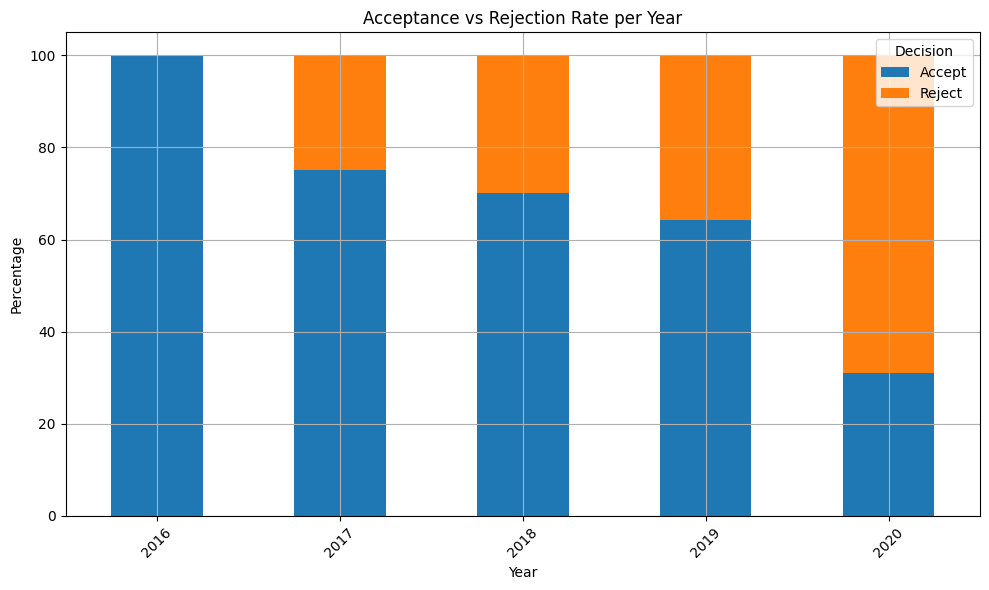

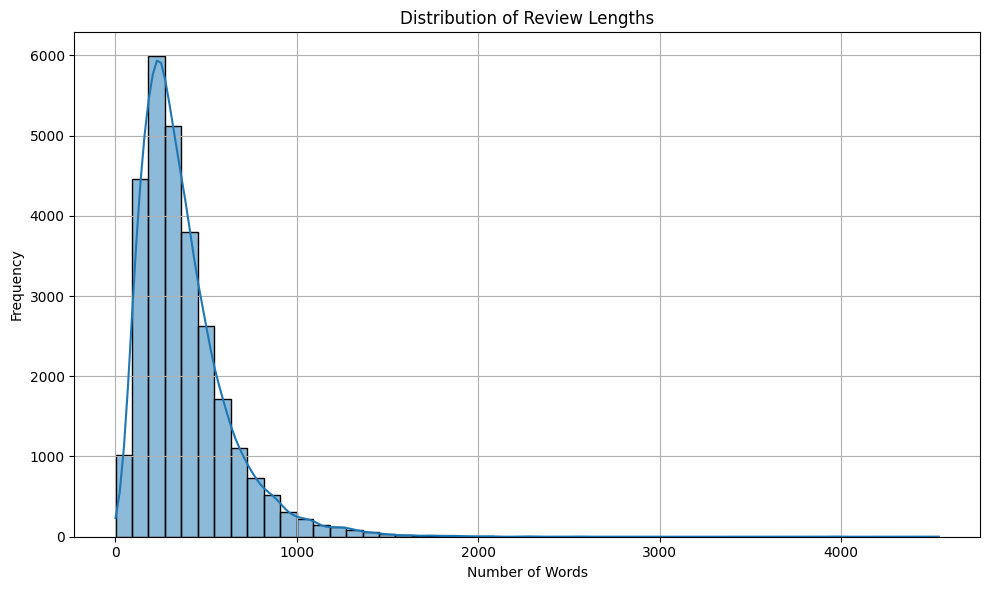

In [7]:
## Acceptance Rate per Year
acceptance_rate_per_year.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Acceptance vs Rejection Rate per Year')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend(title='Decision')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Review Length Distribution
plt.figure(figsize=(10,6))
sns.histplot(reviews_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

7. Quality Checks

In [8]:
## Papers missing content or reviews
missing_content = metadata_df[metadata_df['title'].isnull() | metadata_df['authors'].isnull()]
missing_reviews = metadata_df[metadata_df['paper_id'].isin(reviews_df['paper_id']) == False]
print(f"Papers missing content info: {len(missing_content)}")
print(f"Papers missing reviews: {len(missing_reviews)}")

## Reviews missing rating or confidence
missing_rating = reviews_df['rating'].isnull().sum()
missing_confidence = reviews_df['confidence'].isnull().sum()
print(f"Reviews missing rating: {missing_rating}")
print(f"Reviews missing confidence: {missing_confidence}")


Papers missing content info: 19
Papers missing reviews: 98
Reviews missing rating: 12391
Reviews missing confidence: 15929
